In [5]:
import pandas as pd
import yfinance as yf
import numpy as np
from datetime import datetime, timedelta 
import mplfinance as mpf

__List of Dow Jones Index companies__

_Here, I am downloading from Wikipedia the list of 30 companies creating the Dow Jones Index (DJI)_

In [6]:
# getting a list of Dow Jones Index company tickers from a Wikipedia table

dj_wiki_url = 'https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average'
dj_wiki_df_list = pd.read_html(dj_wiki_url)

dj_df = dj_wiki_df_list[1]
dj_ticker_list = list(dj_df['Symbol'].values) #array into a list

In [7]:
dj_ticker_list

['MMM',
 'AXP',
 'AMGN',
 'AAPL',
 'BA',
 'CAT',
 'CVX',
 'CSCO',
 'KO',
 'DOW',
 'GS',
 'HD',
 'HON',
 'IBM',
 'INTC',
 'JNJ',
 'JPM',
 'MCD',
 'MRK',
 'MSFT',
 'NKE',
 'PG',
 'CRM',
 'TRV',
 'UNH',
 'VZ',
 'V',
 'WBA',
 'WMT',
 'DIS']

__Yahoo Finance historical stock data downloading__
- Historical stock data downloaded from Yahoo Finance with the use of yfinance
- Period of time can be specified beforehead, here the chosen period of time is since the beginning of the last year (2020) and is continued until today
- Time intervals may be chosen as one wishes, here I chose 1 day
- For loop is downloading historical data for every stock in our previous list
- Tickers are appended as a separate column
- Percentge change between close and open price is added as a new column

In [8]:
# Downloading stock data for chosen tickers between start_date and today

start_date = '2020-01-02'
finish_date = datetime.today()
chosen_interval = '1d'
#supported types of interval: 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo

df_list = list()

#for every ticker from out of 30 companies in DJI, historical data is downloaded
for ticker in dj_ticker_list:
    df1 = yf.download(ticker, group_by="Ticker", 
                     interval = chosen_interval, 
                     start = start_date, end = finish_date,
                     # progress = False so that it doesn't show, when the data is being downloaded
                     progress = False)
    df1['ticker'] = ticker
    df_list.append(df1)
    df1 = pd.concat(df_list)
    #adding a column with percentage change between open and close prices
    df1 = df1.assign(percentage_change = (df1['Close'] - df1['Open']) / df1['Open'])

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11100 entries, 2020-01-02 to 2021-06-21
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Open               11100 non-null  float64
 1   High               11100 non-null  float64
 2   Low                11100 non-null  float64
 3   Close              11100 non-null  float64
 4   Adj Close          11100 non-null  float64
 5   Volume             11100 non-null  int64  
 6   ticker             11100 non-null  object 
 7   percentage_change  11100 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 780.5+ KB


_Below, we can see the dataframe with 11070 rows and 8 columns_

In [10]:
df1

,Open,High,Low,Close,Adj Close,Volume,ticker,percentage_change
Date,,,,,,,,
2020-01-02,177.679993,180.009995,177.139999,180.000000,170.862549,3601700,MMM,0.013057
2020-01-03,177.020004,178.660004,175.630005,178.449997,169.391220,2466900,MMM,0.008078
2020-01-06,177.149994,178.710007,176.350006,178.619995,169.552582,1998000,MMM,0.008298
2020-01-07,178.279999,178.509995,176.820007,177.899994,168.869125,2173000,MMM,-0.002132
2020-01-08,178.000000,181.500000,177.649994,180.630005,171.460571,2758300,MMM,0.014775
...,...,...,...,...,...,...,...,...
2021-06-15,178.179993,178.699997,175.619995,175.860001,175.860001,7895000,DIS,-0.013020
2021-06-16,176.009995,176.259995,173.550003,174.660004,174.660004,8336000,DIS,-0.007670
2021-06-17,174.589996,176.259995,173.839996,174.649994,174.649994,8906000,DIS,0.000344


__Dropping any missing values__

However, there are still 11070 rows after dropping missing values - which means, that there were no missing values.

In [11]:
# cleaning data in case there are missing values
df1.dropna()

,Open,High,Low,Close,Adj Close,Volume,ticker,percentage_change
Date,,,,,,,,
2020-01-02,177.679993,180.009995,177.139999,180.000000,170.862549,3601700,MMM,0.013057
2020-01-03,177.020004,178.660004,175.630005,178.449997,169.391220,2466900,MMM,0.008078
2020-01-06,177.149994,178.710007,176.350006,178.619995,169.552582,1998000,MMM,0.008298
2020-01-07,178.279999,178.509995,176.820007,177.899994,168.869125,2173000,MMM,-0.002132
2020-01-08,178.000000,181.500000,177.649994,180.630005,171.460571,2758300,MMM,0.014775
...,...,...,...,...,...,...,...,...
2021-06-15,178.179993,178.699997,175.619995,175.860001,175.860001,7895000,DIS,-0.013020
2021-06-16,176.009995,176.259995,173.550003,174.660004,174.660004,8336000,DIS,-0.007670
2021-06-17,174.589996,176.259995,173.839996,174.649994,174.649994,8906000,DIS,0.000344


__As the values are floats and have many numbers after coma, to enhance readability of the data, stock prices are rounded to 2 decimal places and percentage change - 3 decimal places.__

In [12]:
decimals = pd.Series([2, 2, 2, 2, 2, 3], index=["Open", "High", "Low", "Close", "Adj Close", "percentage_change"])
df2 = df1.round(decimals)

df2

,Open,High,Low,Close,Adj Close,Volume,ticker,percentage_change
Date,,,,,,,,
2020-01-02,177.68,180.01,177.14,180.00,170.86,3601700,MMM,0.013
2020-01-03,177.02,178.66,175.63,178.45,169.39,2466900,MMM,0.008
2020-01-06,177.15,178.71,176.35,178.62,169.55,1998000,MMM,0.008
2020-01-07,178.28,178.51,176.82,177.90,168.87,2173000,MMM,-0.002
2020-01-08,178.00,181.50,177.65,180.63,171.46,2758300,MMM,0.015
...,...,...,...,...,...,...,...,...
2021-06-15,178.18,178.70,175.62,175.86,175.86,7895000,DIS,-0.013
2021-06-16,176.01,176.26,173.55,174.66,174.66,8336000,DIS,-0.008
2021-06-17,174.59,176.26,173.84,174.65,174.65,8906000,DIS,0.000


__Adjusted Close price of stocks, grouped by tickers - plot__

ticker
AAPL    AxesSubplot(0.125,0.2;0.775x0.68)
AMGN    AxesSubplot(0.125,0.2;0.775x0.68)
AXP     AxesSubplot(0.125,0.2;0.775x0.68)
BA      AxesSubplot(0.125,0.2;0.775x0.68)
CAT     AxesSubplot(0.125,0.2;0.775x0.68)
CRM     AxesSubplot(0.125,0.2;0.775x0.68)
CSCO    AxesSubplot(0.125,0.2;0.775x0.68)
CVX     AxesSubplot(0.125,0.2;0.775x0.68)
DIS     AxesSubplot(0.125,0.2;0.775x0.68)
DOW     AxesSubplot(0.125,0.2;0.775x0.68)
GS      AxesSubplot(0.125,0.2;0.775x0.68)
HD      AxesSubplot(0.125,0.2;0.775x0.68)
HON     AxesSubplot(0.125,0.2;0.775x0.68)
IBM     AxesSubplot(0.125,0.2;0.775x0.68)
INTC    AxesSubplot(0.125,0.2;0.775x0.68)
JNJ     AxesSubplot(0.125,0.2;0.775x0.68)
JPM     AxesSubplot(0.125,0.2;0.775x0.68)
KO      AxesSubplot(0.125,0.2;0.775x0.68)
MCD     AxesSubplot(0.125,0.2;0.775x0.68)
MMM     AxesSubplot(0.125,0.2;0.775x0.68)
MRK     AxesSubplot(0.125,0.2;0.775x0.68)
MSFT    AxesSubplot(0.125,0.2;0.775x0.68)
NKE     AxesSubplot(0.125,0.2;0.775x0.68)
PG      AxesSubplot(0.125,0

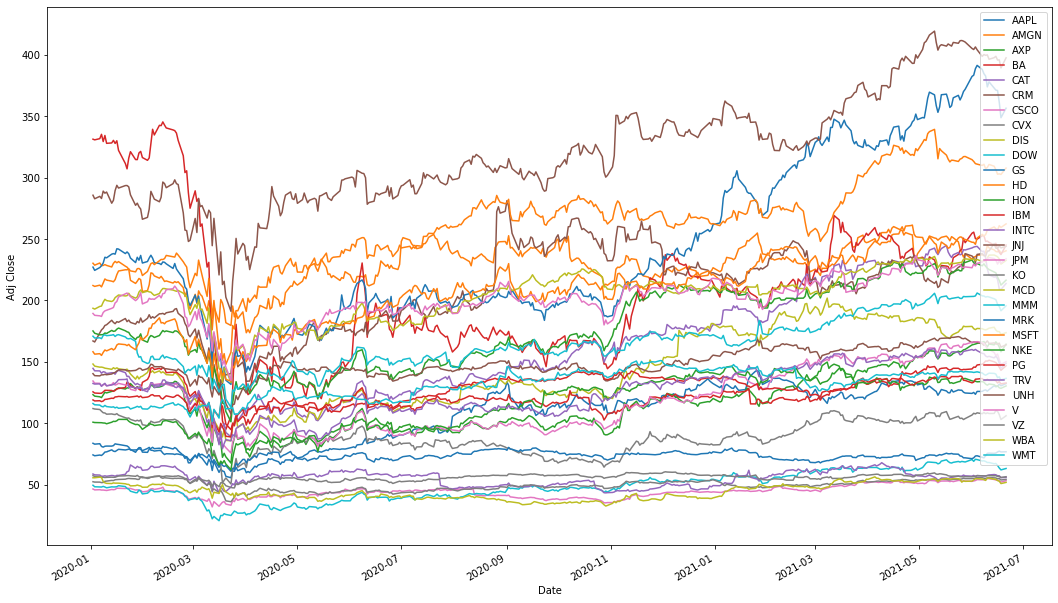

In [13]:
df3 = df2.groupby('ticker')['Adj Close'].\
plot(legend=True, figsize=(18, 11), ylabel='Adj Close')

df3

It is hard to see the tendency of adjusted close price for each company. However, it is clearly visible that the prices crashed at the start of pandemics, in March 2020. Some companies remained at a lower level after a dip, some came back to the prices before the drop and some went up by a lot.

__Daily stock exchange volume, grouped by tickers - plot__

ticker
AAPL    AxesSubplot(0.125,0.2;0.775x0.68)
AMGN    AxesSubplot(0.125,0.2;0.775x0.68)
AXP     AxesSubplot(0.125,0.2;0.775x0.68)
BA      AxesSubplot(0.125,0.2;0.775x0.68)
CAT     AxesSubplot(0.125,0.2;0.775x0.68)
CRM     AxesSubplot(0.125,0.2;0.775x0.68)
CSCO    AxesSubplot(0.125,0.2;0.775x0.68)
CVX     AxesSubplot(0.125,0.2;0.775x0.68)
DIS     AxesSubplot(0.125,0.2;0.775x0.68)
DOW     AxesSubplot(0.125,0.2;0.775x0.68)
GS      AxesSubplot(0.125,0.2;0.775x0.68)
HD      AxesSubplot(0.125,0.2;0.775x0.68)
HON     AxesSubplot(0.125,0.2;0.775x0.68)
IBM     AxesSubplot(0.125,0.2;0.775x0.68)
INTC    AxesSubplot(0.125,0.2;0.775x0.68)
JNJ     AxesSubplot(0.125,0.2;0.775x0.68)
JPM     AxesSubplot(0.125,0.2;0.775x0.68)
KO      AxesSubplot(0.125,0.2;0.775x0.68)
MCD     AxesSubplot(0.125,0.2;0.775x0.68)
MMM     AxesSubplot(0.125,0.2;0.775x0.68)
MRK     AxesSubplot(0.125,0.2;0.775x0.68)
MSFT    AxesSubplot(0.125,0.2;0.775x0.68)
NKE     AxesSubplot(0.125,0.2;0.775x0.68)
PG      AxesSubplot(0.125,0

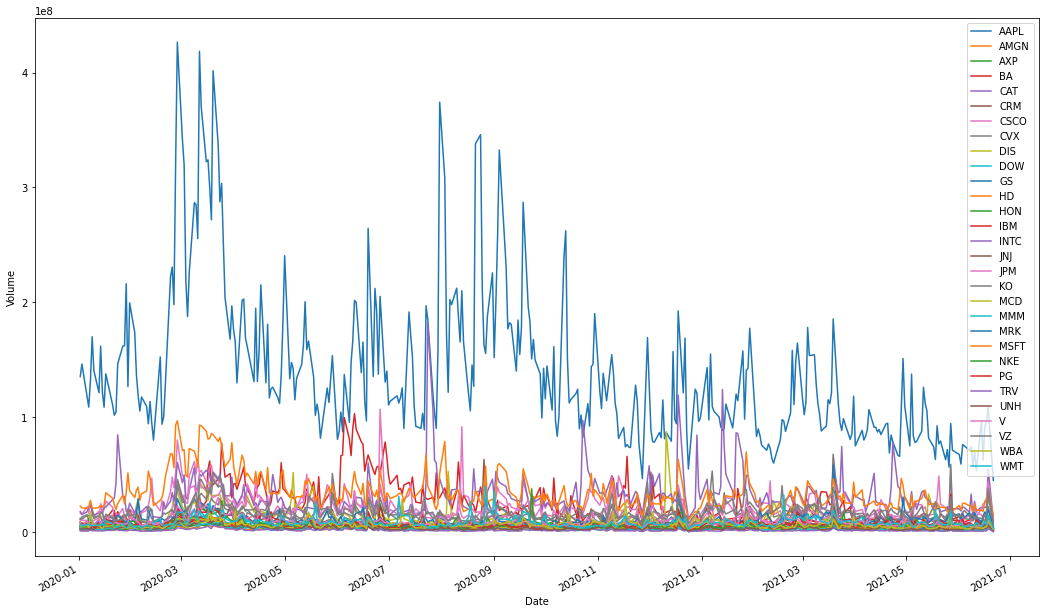

In [14]:
df4 = df2.groupby('ticker')['Volume'].\
plot(legend=True, figsize=(18, 11), ylabel='Volume')
df4 #26

Highest volumes of Apple stock exchange can be easily visible. However, it is hard to say, whether at the beginning of pandemics volumes increased significantly, as in other periods there had been many spikes and dips.

__Percentage change between daily close nad open prices, grouped by tickers - plot__

ticker
AAPL    AxesSubplot(0.125,0.2;0.775x0.68)
AMGN    AxesSubplot(0.125,0.2;0.775x0.68)
AXP     AxesSubplot(0.125,0.2;0.775x0.68)
BA      AxesSubplot(0.125,0.2;0.775x0.68)
CAT     AxesSubplot(0.125,0.2;0.775x0.68)
CRM     AxesSubplot(0.125,0.2;0.775x0.68)
CSCO    AxesSubplot(0.125,0.2;0.775x0.68)
CVX     AxesSubplot(0.125,0.2;0.775x0.68)
DIS     AxesSubplot(0.125,0.2;0.775x0.68)
DOW     AxesSubplot(0.125,0.2;0.775x0.68)
GS      AxesSubplot(0.125,0.2;0.775x0.68)
HD      AxesSubplot(0.125,0.2;0.775x0.68)
HON     AxesSubplot(0.125,0.2;0.775x0.68)
IBM     AxesSubplot(0.125,0.2;0.775x0.68)
INTC    AxesSubplot(0.125,0.2;0.775x0.68)
JNJ     AxesSubplot(0.125,0.2;0.775x0.68)
JPM     AxesSubplot(0.125,0.2;0.775x0.68)
KO      AxesSubplot(0.125,0.2;0.775x0.68)
MCD     AxesSubplot(0.125,0.2;0.775x0.68)
MMM     AxesSubplot(0.125,0.2;0.775x0.68)
MRK     AxesSubplot(0.125,0.2;0.775x0.68)
MSFT    AxesSubplot(0.125,0.2;0.775x0.68)
NKE     AxesSubplot(0.125,0.2;0.775x0.68)
PG      AxesSubplot(0.125,0

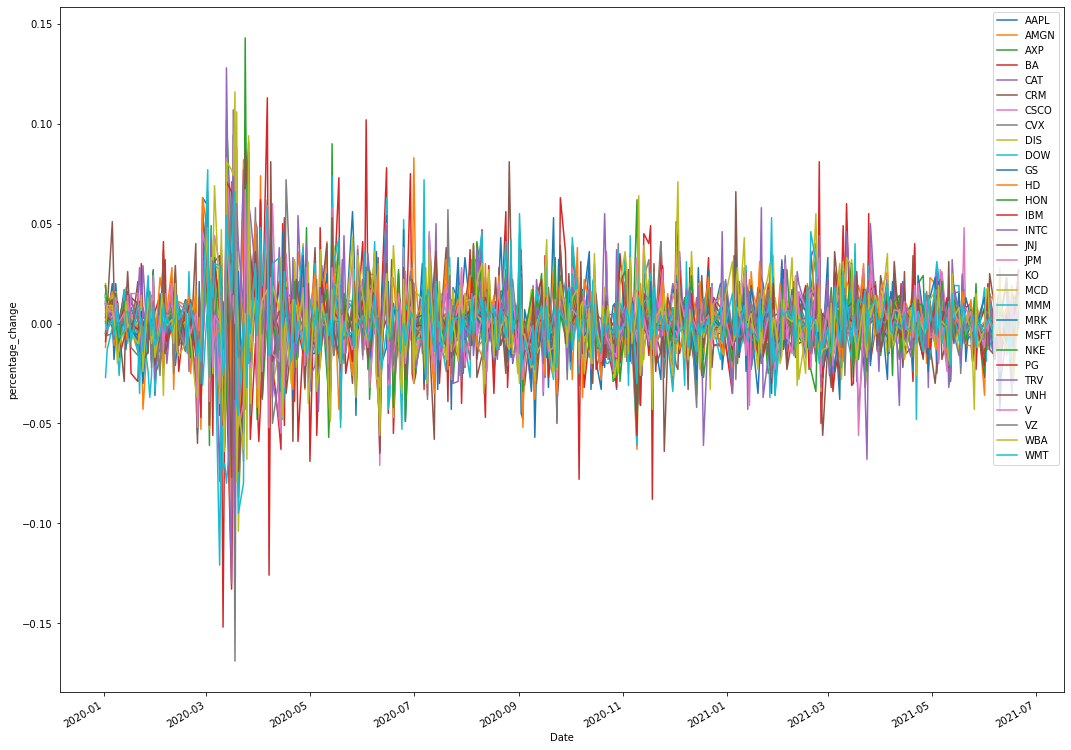

In [15]:
df5 = df2.groupby('ticker')['percentage_change'].\
plot(legend=True, figsize=(18, 14), ylabel='percentage_change')
df5 #28

Here, the period between March and April 2020 stands out with the biggest percentage changes.

Below, __ten companies with the biggest (positive) maximum percentage change__ is displayed (as well as other statistics for these companies).

__American Express(AXP)__ noted changes as high as __14,3%__, folowed by __Intel Corporation - 12,8%, Walgreens Boots Alliance Inc - 11,6%, Boeing - 11,3%.__

In [16]:
df2.groupby('ticker').describe()['percentage_change'].\
sort_values(['max'], ascending=False).head(10)
#30

,count,mean,std,min,25%,50%,75%,max
ticker,,,,,,,,
AXP,370.0,0.000276,0.021286,-0.078,-0.00900,0.0010,0.01000,0.143
INTC,370.0,0.000546,0.020780,-0.068,-0.01175,0.0000,0.01100,0.128
WBA,370.0,0.000076,0.022754,-0.079,-0.01275,-0.0005,0.01075,0.116
BA,370.0,-0.003549,0.029856,-0.152,-0.01900,-0.0040,0.01075,0.113
TRV,370.0,0.000511,0.019632,-0.130,-0.01000,0.0010,0.00900,0.107
MCD,370.0,0.000519,0.014853,-0.060,-0.00600,0.0000,0.00675,0.106
NKE,370.0,0.000100,0.016383,-0.057,-0.00900,0.0000,0.00900,0.101
CSCO,370.0,0.001124,0.016592,-0.071,-0.00700,0.0005,0.00975,0.100
UNH,370.0,0.000938,0.019280,-0.077,-0.00900,0.0000,0.00900,0.091


Table below presents 10 companies with the highest negative percengtage change during the analysed period (as well as other statistics for these companies).

Chevron Corporation fell by almost 17%, Boeing by over 15%, TRW Automotive Holdings Corp. by 13%, Dow Inc - by 12%.

In [17]:
# Percentage change statistics for the companies sorted by min
df2.groupby('ticker').describe()['percentage_change'].\
sort_values(['min'], ascending=True).head(10)
#32

,count,mean,std,min,25%,50%,75%,max
ticker,,,,,,,,
CVX,370.0,-0.000573,0.021521,-0.169,-0.01200,-0.0010,0.01100,0.086
BA,370.0,-0.003549,0.029856,-0.152,-0.01900,-0.0040,0.01075,0.113
TRV,370.0,0.000511,0.019632,-0.130,-0.01000,0.0010,0.00900,0.107
DOW,370.0,-0.000470,0.023224,-0.121,-0.01400,-0.0020,0.01275,0.074
DIS,370.0,-0.000259,0.018204,-0.104,-0.00900,-0.0010,0.00900,0.079
MMM,370.0,-0.000422,0.016667,-0.095,-0.00800,0.0000,0.00800,0.085
HD,370.0,0.001016,0.016306,-0.093,-0.00700,0.0020,0.00900,0.082
KO,370.0,-0.000889,0.014321,-0.087,-0.00700,0.0000,0.00600,0.071
CAT,370.0,0.001108,0.018531,-0.079,-0.01000,0.0000,0.01000,0.065


__Highest maximum daily volume statistics for top 10 companies__ (as well as other statistics for these companies) are presented in the table below.

Apple Inc. with over 426,5 million volume of exchange is at the top, followed by Intel Corporation - 182,2 M, Cisco Systems - about 107 M, Boeing 103 M.

In [18]:
# Volume statistics for the companies sorted by maximum volume
df2.groupby('ticker').describe()['Volume'].\
sort_values(['max'], ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
ticker,,,,,,,,
AAPL,370.0,1.386423e+08,6.604802e+07,45140721.0,92455850.0,119194200.0,1.641759e+08,426510000.0
INTC,370.0,3.169674e+07,1.719542e+07,10508301.0,21623175.0,27769750.0,3.588785e+07,182269900.0
CSCO,370.0,2.372650e+07,1.174449e+07,5720500.0,16500025.0,20394350.0,2.681545e+07,106928300.0
BA,370.0,2.402730e+07,1.746694e+07,2807500.0,11234225.0,18829950.0,3.127188e+07,103212800.0
MSFT,370.0,3.459215e+07,1.542522e+07,10550600.0,24351650.0,30374350.0,3.794760e+07,97012700.0
DIS,370.0,1.320732e+07,8.760369e+06,2721000.0,7745350.0,10247800.0,1.608788e+07,87410700.0
KO,370.0,1.701387e+07,8.146123e+06,3265500.0,12356850.0,15266650.0,1.877020e+07,67845700.0
CRM,370.0,7.234970e+06,5.345407e+06,2676900.0,4598850.0,5797400.0,8.121375e+06,63253400.0
MRK,370.0,1.129821e+07,4.900943e+06,2957456.0,8273934.0,10249335.5,1.298076e+07,58225203.0


__Since Apple had the highest maximum volume of stock exchange and generally stands out with its volume of the company compared to other in the index, data exclusively for Apple is downloaded and presented on the candleplot below.__

In [19]:
# downloading data for Apple Inc.
df_aapl = yf.download('AAPL', 
                     interval = chosen_interval, 
                     start = start_date, end = finish_date,
                     progress = False)

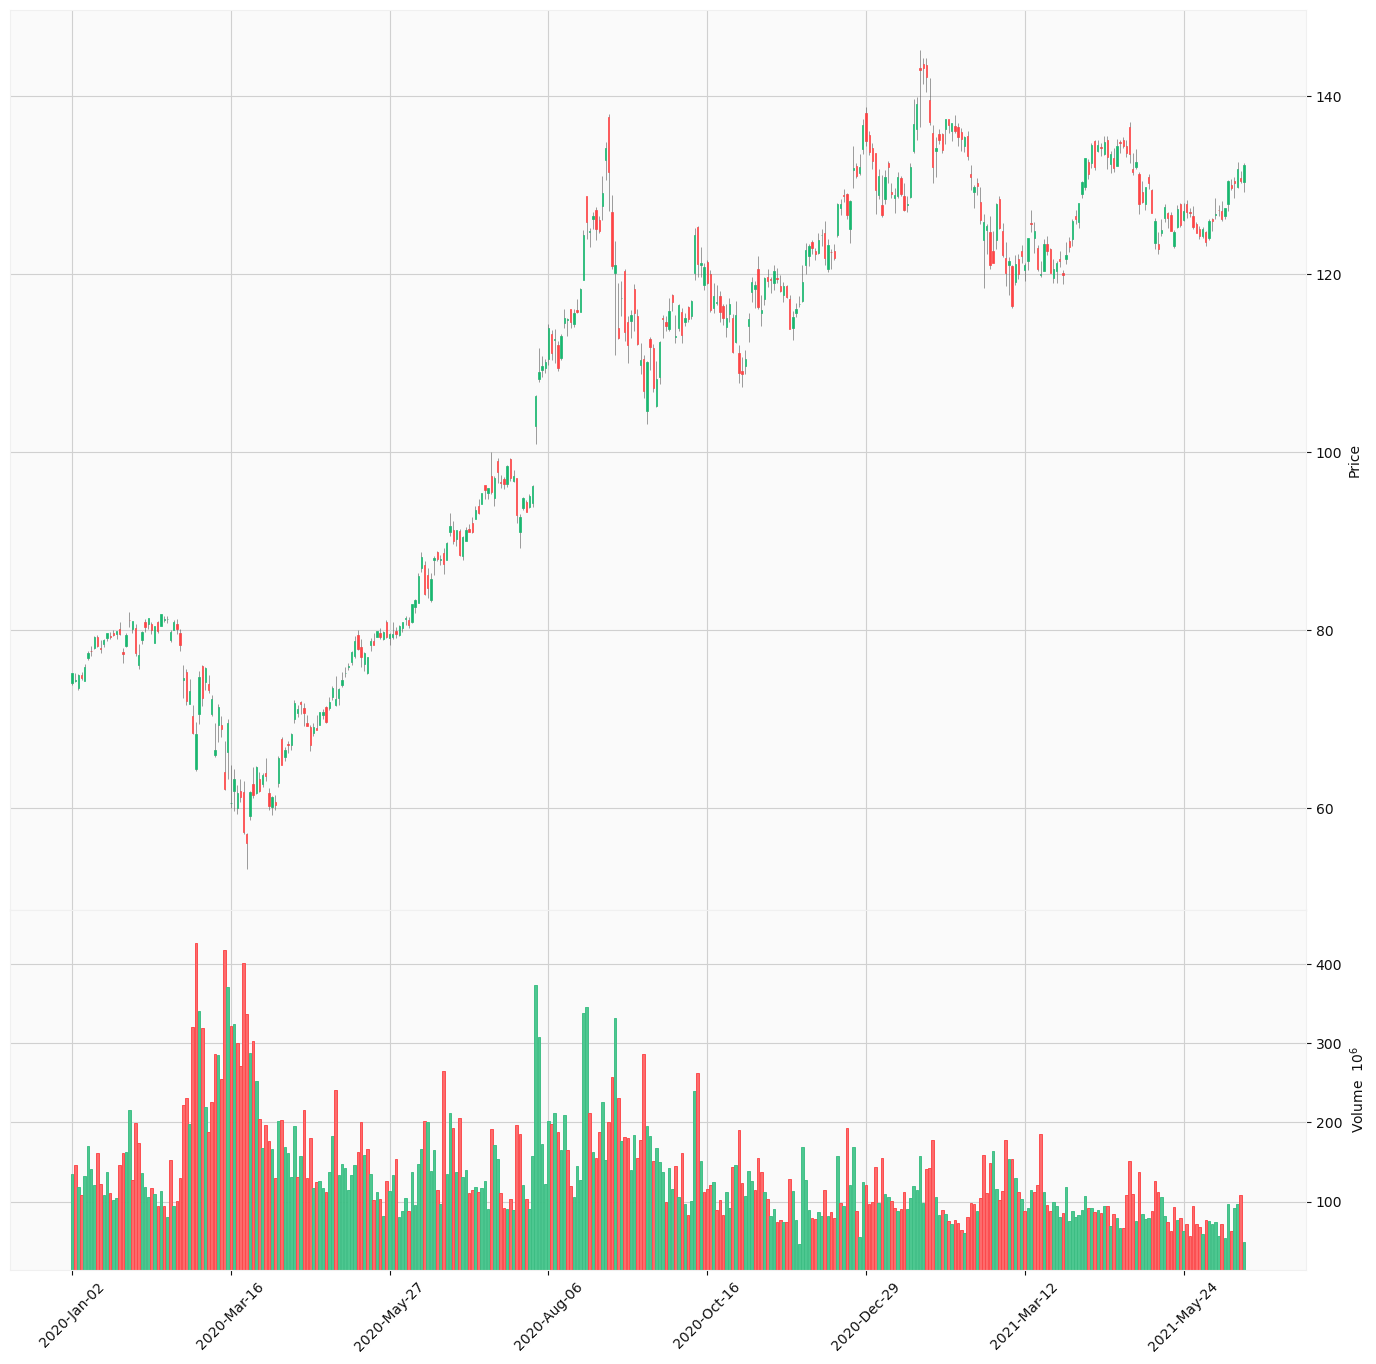

In [20]:
# candleplot for Apple
mpf.plot(df_aapl, type='candle', style='yahoo', volume=True, figsize=(18, 18))

In March 2020 prices fell from 80 to 60 USD only to rise afterwards in the next 4 months to nearly 140 USD. During next months the price amonted between approximately 100 and 140 USD.

__Companies with the highest positive percentage change between close and open price__

- American Express
- Intel Corporation
- Walgreens Boots Alliance Inc
- Boeing

Again, downloading method is similar to the ones above.

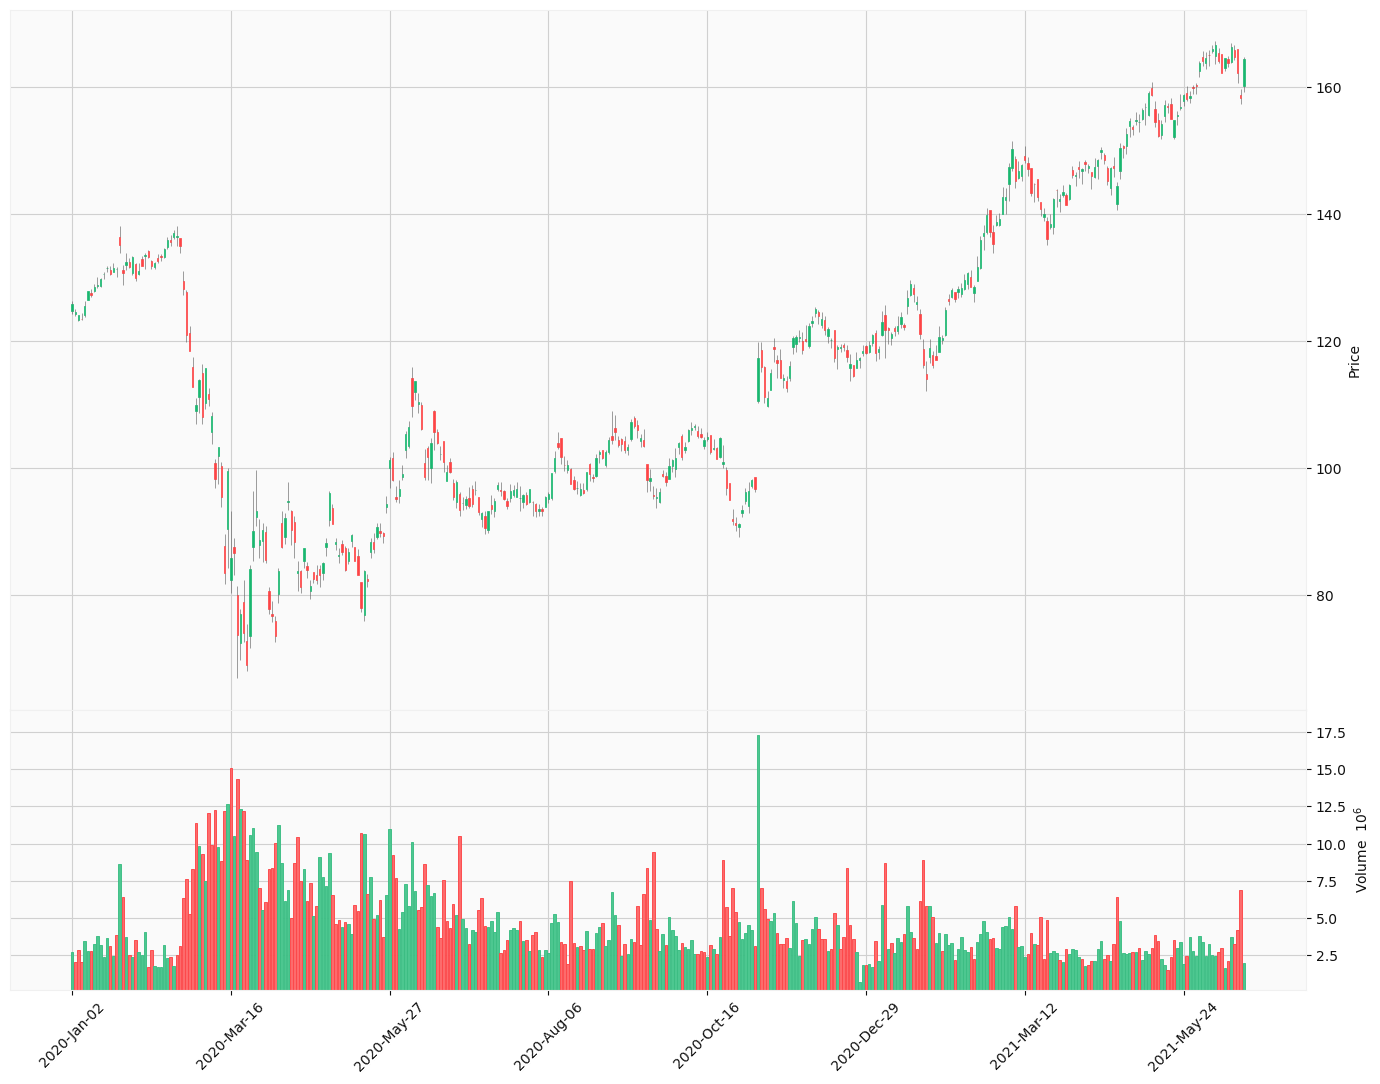

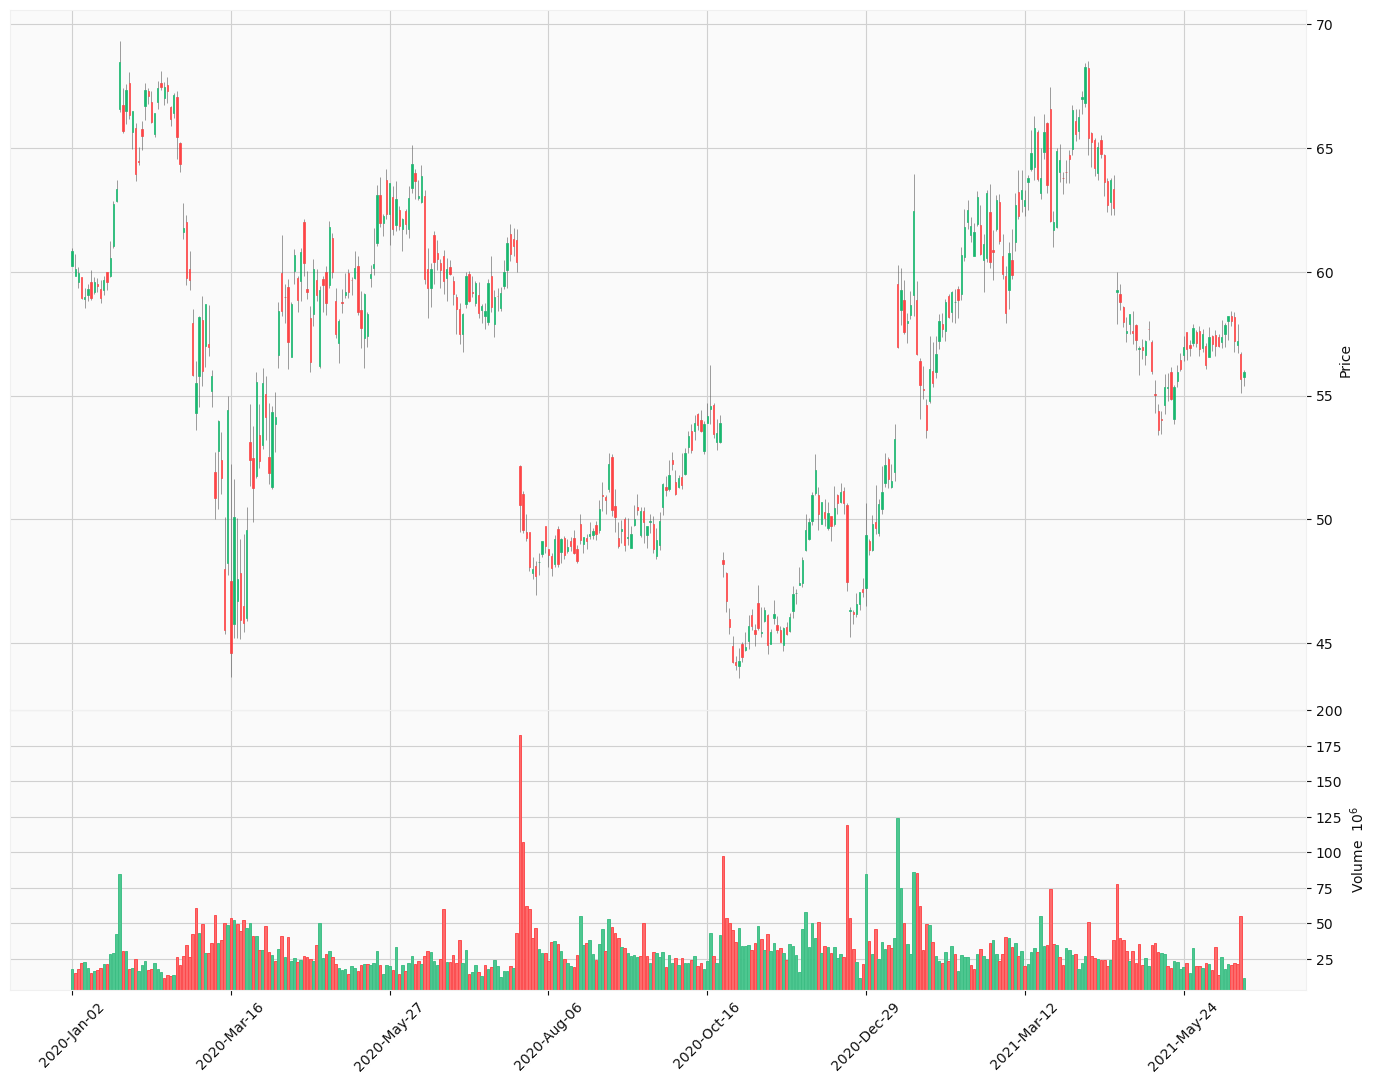

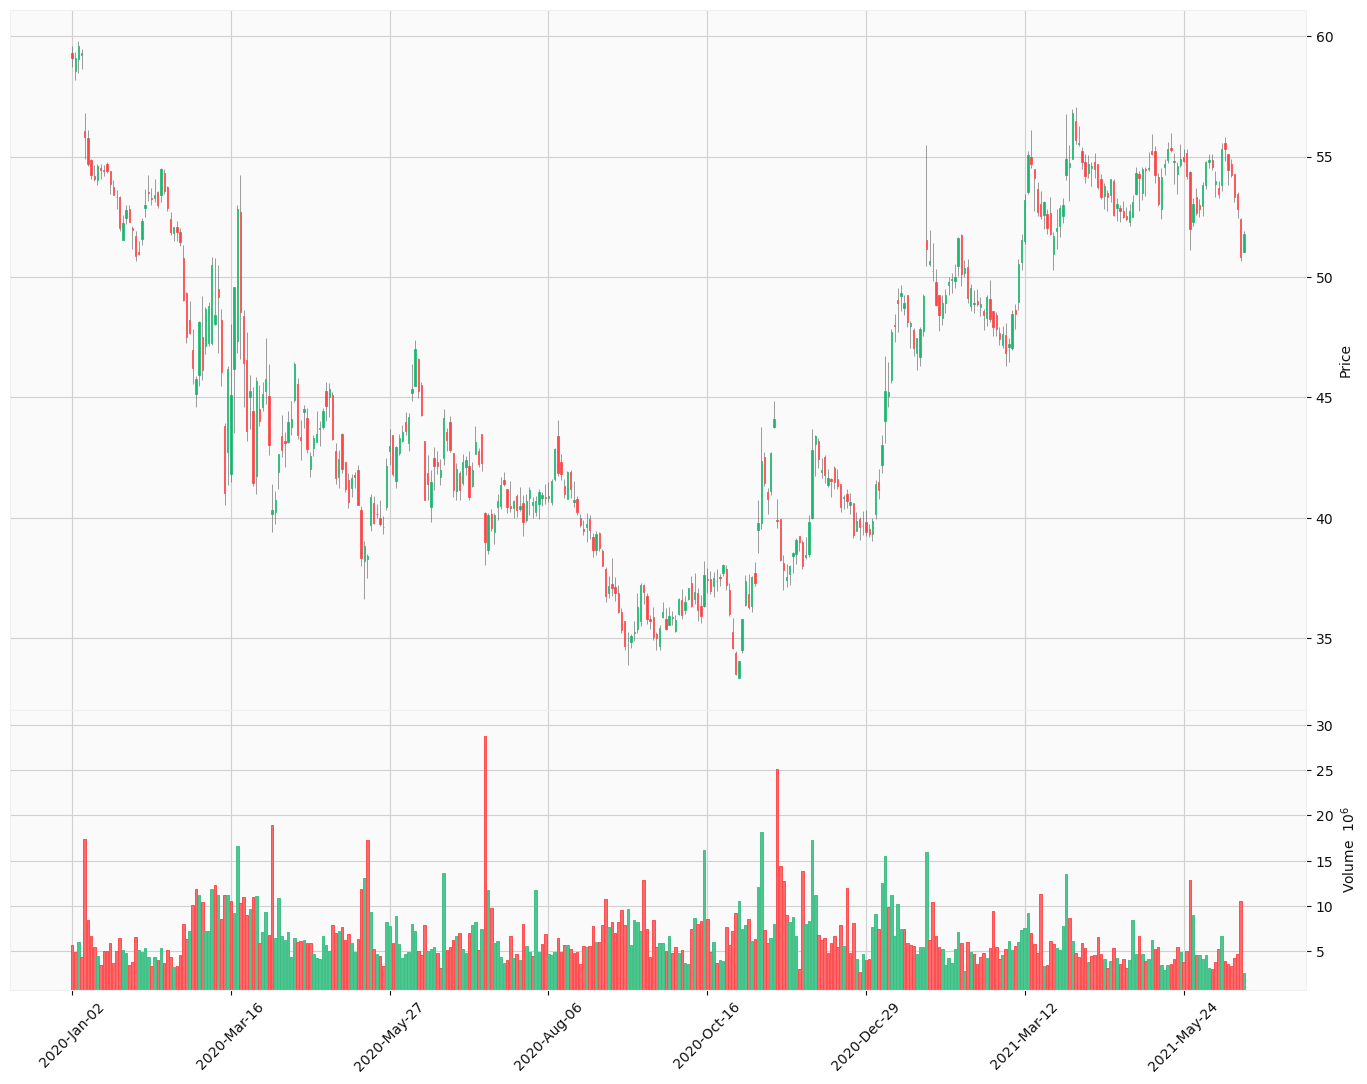

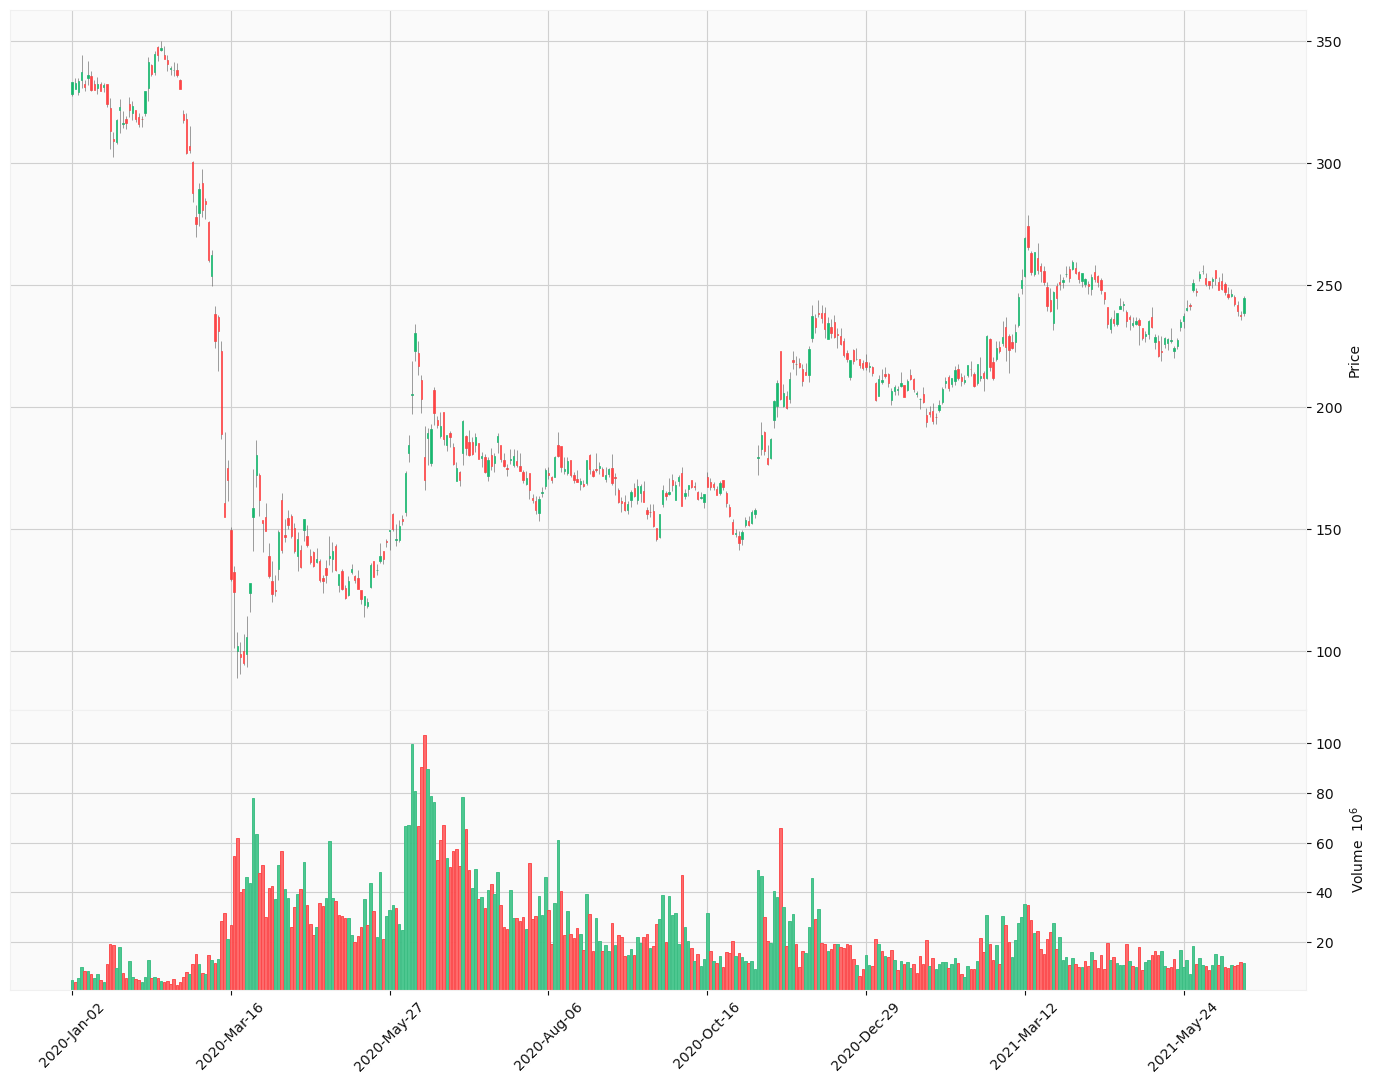

In [21]:
# introducing a set of 4 companies with the highest percentage change between close and open price
df_max_list = ['AXP', 'INTC', 'WBA', 'BA']
df_max_list1 = list(df_max_list) #array into a list

df_list = list()

# for each company: downloading historical data and creating candleplot
for ticker in df_max_list:
    df_max = yf.download(ticker, group_by="Ticker", 
                     interval = chosen_interval, 
                     start = start_date, end = finish_date,
                     progress = False)
    df_max['ticker'] = ticker
    df_max = df_max.assign(percentage_change = (df_max['Close'] - df_max['Open']) / df_max['Open'])
    #candleplot
    mpf.plot(df_max, type='candle', style='yahoo', volume=True, figsize=(18, 14))
    

- __American Express plot__

In March 2020 prices halved, but a year later, the company came back to stock prices just before the pandemics. During last month, prices amounted to over 160 USD.

- __Intel Corporation__

Prices were very irregular without a constant tendency with high daily changes throughout the analysed period.

- __Walgreens Boots Alliance Inc__

The company does not seem to be affected by the start of the pandemic itself (despite high daily differences in prices in March 2020), but rather with its consequences. The biggest dip was observed at the beginning of November 2020. Since March 2021, company's stock prices returned to the values just before the pandemics.

- __Boeing__

In March 2020, prices fell from 350 to 100 USD. The price has been going up slowly, reaching about 250 USD in recent months.

__Below, Dow Jones Industrial Average Index historical data is presented__  in the same period as earlier. Here, __1 week is the chosen interval__ for better visibility.

In [27]:
# downloading Dow Jones Industrial Average(^DJI) historical data from the table on Yahoo finance website
chosen_interval = "1wk"
dji = yf.download('DJI', interval = chosen_interval, 
                     start = start_date, end = finish_date,
                     progress = False)

In [28]:
dji = dji.dropna()
dji

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,28634.900391,28703.400391,28583.699219,28583.699219,28583.699219,0
2020-01-08,28745.099609,28956.900391,28745.099609,28939.699219,28939.699219,0
2020-01-15,29030.199219,29348.099609,29030.199219,29196.000000,29196.000000,0
2020-01-22,29186.300781,29186.300781,28535.800781,28722.800781,28722.800781,0
2020-01-29,28734.400391,28859.400391,28256.000000,28807.599609,28807.599609,0
...,...,...,...,...,...,...
2021-05-19,33896.000000,34394.000000,33896.000000,34312.500000,34312.500000,0
2021-05-26,34323.101562,34575.300781,34323.101562,34575.300781,34575.300781,0
2021-06-02,34600.398438,34756.398438,34577.000000,34599.800781,34599.800781,0


__Statistics for the Dow Jones Index__

In [30]:
dji.describe()

,Open,High,Low,Close,Adj Close,Volume
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.0
mean,28783.897474,29143.513063,28410.372717,28822.329850,28822.329850,0.0
std,3481.634138,3356.064200,3678.704459,3479.543466,3479.543466,0.0
min,19898.900391,20704.900391,18591.900391,20704.900391,20704.900391,0.0
25%,26763.099609,26990.000000,26269.900391,26642.599609,26642.599609,0.0
50%,28745.099609,29100.500000,28331.900391,28722.800781,28722.800781,0.0
75%,31188.400391,31385.800781,30924.099609,31375.800781,31375.800781,0.0
max,34600.398438,34777.800781,34577.000000,34599.800781,34599.800781,0.0


__Candleplot for weekly historical data of Dow Jones Index including moving avarage__

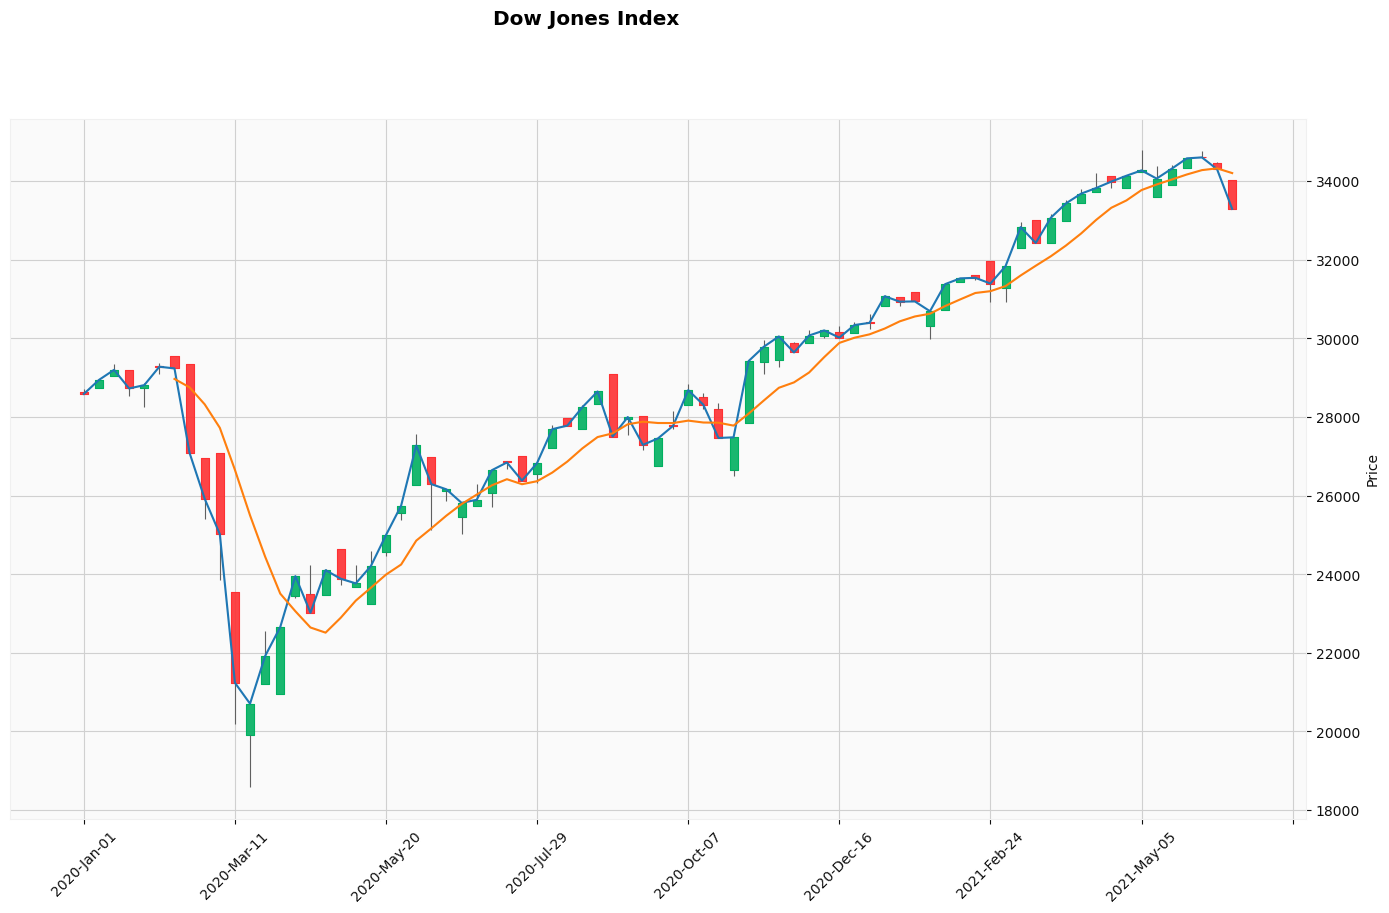

In [31]:
# moving average for 1 day and 1 week
mpf.plot(dji, type='candle', style='yahoo', volume=False, mav=(1, 7), title='Dow Jones Index', figsize=(18, 10))
# 57

Here, a dip between the half of February 2020 and the end of MArch 2020 is clearly visible. However, during next months the tendency is slowly growing. During the last month, the price amounts to 34000 USD, whereas at the beginning of 2020, it amounted to about 29000 USD.